[IPython Notebook](beaming_boosting.ipynb) |  [Python Script](beaming_boosting.py)

Beaming and Boosting (not yet implemented)
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.default_binary()

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)



We'll add LC, RV, and MESH datasets so that we can see how they're each affected by beaming and boosting.

In [3]:
times = np.linspace(0,3,101)

In [4]:
b.add_dataset('lc', times=times, dataset='lc01')

<ParameterSet: 12 parameters | kinds: lc, lc_dep>

In [5]:
b.add_dataset('rv', times=times, dataset='rv01')

<ParameterSet: 10 parameters | kinds: rv, rv_dep>

In [6]:
b.add_dataset('mesh', times=times[::10], dataset='mesh01')

<ParameterSet: 1 parameters>

Relevant Parameters
---------------------------------

In [7]:
b.add_compute(compute='mycompute')

<ParameterSet: 27 parameters | datasets: mesh01, lc01, rv01>

In [8]:
print b['boosting_method@compute']

Parameter: boosting_method@mycompute@compute
                       Qualifier: boosting_method
                     Description: Type of boosting method
                           Value: none
                         Choices: none, linear



In [9]:
print b['boosting_method@compute'].choices

['none', 'linear']


Influence on Light Curves (fluxes)
----------------------------

In [10]:
b.run_compute(compute='mycompute', model='boosting_none')

<ParameterSet: 822 parameters | kinds: rv, mesh, lc>

In [11]:
# TODO: run other models once boosting is fully-supported

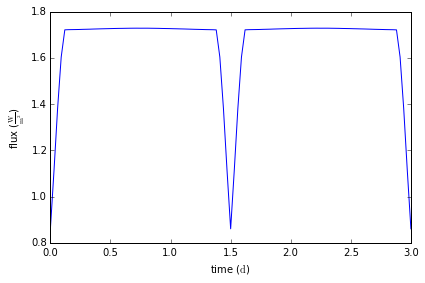

In [12]:
axs, artists = b['lc01@boosting_none'].plot()

Influence on Radial Velocities
---------------------

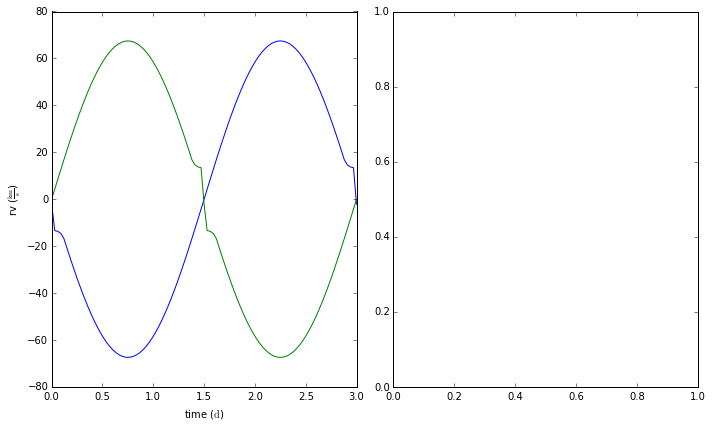

In [13]:
fig = plt.figure(figsize=(10,6))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

axs, artists = b['rv01@boosting_none'].plot(ax=ax1)

Influence on Meshes
-------------------------

/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:242: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:242: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


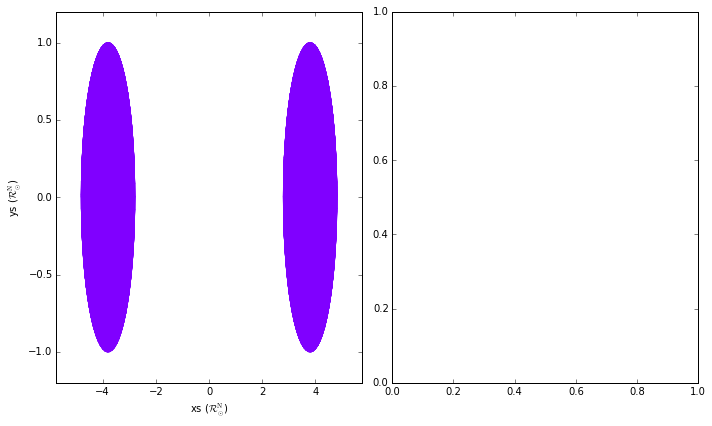

In [15]:
fig = plt.figure(figsize=(10,6))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

axs, artists = b['mesh@boosting_none'].plot(time=0.6, facecolor='boost_factors@lc01', edgecolor=None, ax=ax1)